## Task 1: Import Modules

In [5]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import soundfile
import pandas as pd

## Task 2: Load Audio and Plot Correlation

[Text(0.5, 1.0, 'Auto-correlation'),
 Text(0.5, 0, 'Lag (frames)'),
 Text(0, 0.5, 'Correlation')]

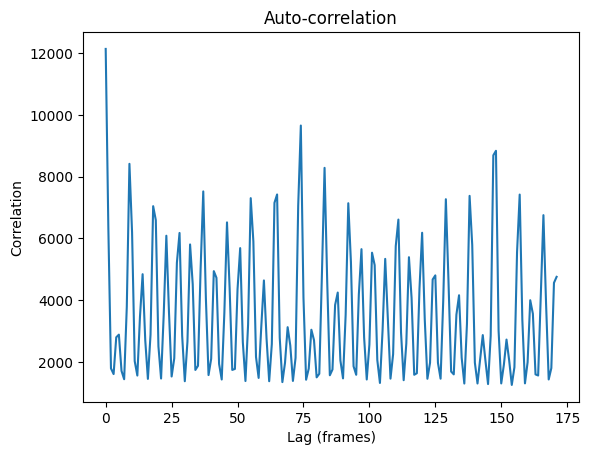

In [6]:
y, sr = librosa.load('example.wav')
onset_strength = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512)
correlation = librosa.autocorrelate(onset_strength, max_size=4 * sr // 512)
fig, ax = plt.subplots()
ax.plot(correlation)
ax.set(title='Auto-correlation', xlabel='Lag (frames)', ylabel = 'Correlation')

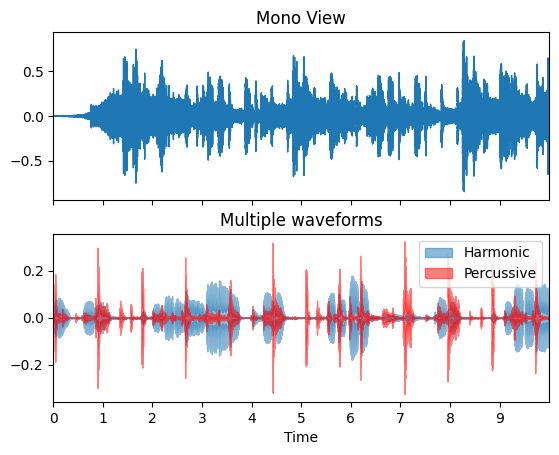

In [7]:
import librosa.display
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.waveplot(y, sr=sr, ax=ax[0])
ax[0].set(title='Mono View')
ax[0].label_outer()

y, sr = librosa.load(librosa.ex('choice'), duration=10)
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.5, ax=ax[1], label='Harmonic')
librosa.display.waveplot(y_perc, sr=sr, color='r',
                         alpha=0.5, ax=ax[1], label='Percussive')
ax[1].set(title='Multiple waveforms')
ax[1].legend()

## Task 3: Plot Multiple Waves

## Task 4: Feature Extraction

In [8]:
def extract_feature(file_name):
    with soundfile.SoundFile(file_name) as sound_file:
        file = sound_file.read(dtype="float32")
        result = np.array([])
        sample_rate = sound_file.samplerate
        # Calculate MFCC
        mel_frequency = np.mean(librosa.feature.mfcc(y=file, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mel_frequency))
        # Calculate Chroma
        chroma = np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(file)), sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))
        # Calculate Spectral Scale
        spectralScale = np.mean(librosa.feature.melspectrogram(file, sr=sample_rate).T, axis=0)
        result = np.hstack((result, spectralScale))
    return result

Get the mel frequency cepstral coefficients (mfcc) of the audio file using the librosa. This small set of features describes the overall shape of the spectral envelope.
Get the chroma feature of the audio file. This feature describes the pitch of the audio file.
Get the spectral scale of pitches of the audio file.
Create a new NumPy list and add all of these features to that list and return it.

## Task 5: Create Labels

In [9]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '07': 'disgust',
}
observed_emotions = ['neutral', 'calm', 'happy', 'disgust']


## Task 6: Load Audio Files

In [10]:
def load_data(BasePath):
    data, labels = [], []
    for root, dirc, files in os.walk(BasePath):
        for file in files:
            found = True
            if file[-3:] == 'wav':
                file = os.path.join(root, file)
                emotionValue = file.split("-")[2]
                if int(emotionValue) < 4 or int(emotionValue) == 7:
                    emotion = emotions[file.split("-")[2]]
                    if emotion not in observed_emotions:
                        found = False
                    if found:
                        feature = extract_feature(file)
                        data.append(feature)
                        labels.append(emotion)
    return np.array(data), labels

In [11]:
data, labels = load_data("Data")
print("Shape of data: ", data.shape)
print("Number of labels: ", len(labels))

Shape of data:  (672, 180)
Number of labels:  672


## Task 7: Import Scikit Modules

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Task 8: Split the Training and Testing Data

In [13]:
training_x, testing_x, training_y, testing_y = train_test_split(data, labels, test_size=0.05, random_state=5)

## Task 9: Plot the Emotions

<AxesSubplot: >

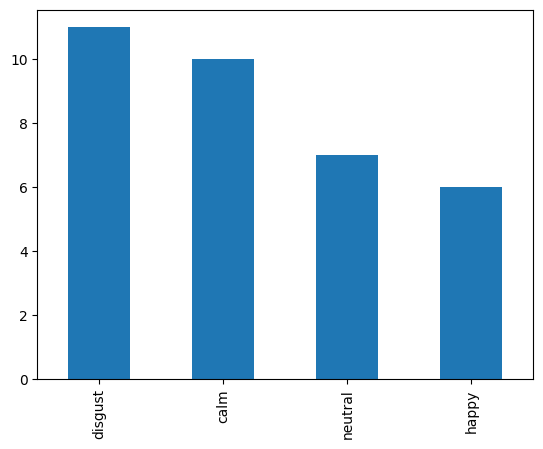

In [14]:
df = pd.DataFrame(testing_y, columns=['Emotions'])
df.Emotions.value_counts().plot(kind='bar')

## Task 10: Initialize the Classifier

In [15]:
model=MLPClassifier(alpha=0.1, batch_size=256, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

## Task 11: Classify and Get the Predictions

In [17]:
model.fit(training_x, training_y)

MLPClassifier(alpha=0.1, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [18]:
predictions = model.predict(testing_x)
print(predictions)

['happy' 'disgust' 'disgust' 'disgust' 'neutral' 'happy' 'neutral' 'happy'
 'neutral' 'disgust' 'disgust' 'disgust' 'neutral' 'neutral' 'calm'
 'happy' 'disgust' 'calm' 'neutral' 'disgust' 'disgust' 'happy' 'calm'
 'neutral' 'neutral' 'happy' 'neutral' 'disgust' 'neutral' 'happy' 'calm'
 'neutral' 'neutral' 'neutral']


## Task 12: Calculate Accuracy

In [19]:
for i in range(len(testing_y)):
    print(testing_y[i], " - ", predictions[i])
score = accuracy_score(y_true=testing_y, y_pred=predictions)
print("Accuracy: ", score*100, "%")

happy  -  happy
disgust  -  disgust
disgust  -  disgust
disgust  -  disgust
neutral  -  neutral
disgust  -  happy
calm  -  neutral
disgust  -  happy
neutral  -  neutral
disgust  -  disgust
disgust  -  disgust
disgust  -  disgust
calm  -  neutral
neutral  -  neutral
calm  -  calm
happy  -  happy
calm  -  disgust
calm  -  calm
neutral  -  neutral
disgust  -  disgust
disgust  -  disgust
happy  -  happy
neutral  -  calm
calm  -  neutral
calm  -  neutral
happy  -  happy
calm  -  neutral
disgust  -  disgust
calm  -  neutral
happy  -  happy
calm  -  calm
neutral  -  neutral
neutral  -  neutral
happy  -  neutral
Accuracy:  67.64705882352942 %


## Task 13: Plot the Loss Curve

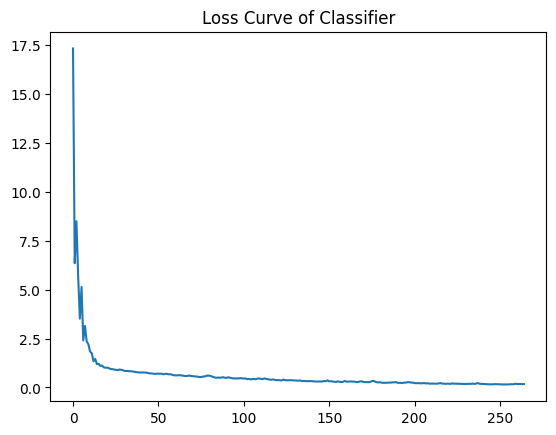

In [20]:
loss = model.loss_curve_
plt.title("Loss Curve of Classifier")
plt.plot(loss)